## Openebench_gmi


In [105]:
import json
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm 
in_file = '../datasets/benchmark_data/participant_matrix.json'
with open(in_file) as json_file:  
    data = json.load(json_file)

In [106]:
participants = data['participants']
p_matrix_values = np.array(data['matrix']['values'])
p_matrix_values

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.09090909, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.09090909, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.09090909, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.09090909, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.33333333, 0.28571429, 0.28571429, 0.28571429, 0.28571429,
        0.        , 0.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.        ]])

#### Upper matrix masking
For upper matrix masking we have to create a boolean mask array and transpose it. Then we mask the p_matrix_values array and we round the values to 3 decimals.

In [107]:
mask =  np.tri(p_matrix_values.shape[0],k=-1)
print(mask.T)
p_matrix_values = np.ma.array(p_matrix_values, mask=mask.T) # mask out the lower triangle
p_matrix_values = np.around(p_matrix_values,decimals=2)
p_matrix_values

[[0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0.]]


masked_array(
  data=[[0.0, --, --, --, --, --, --],
        [0.09, 0.0, --, --, --, --, --],
        [0.09, 0.0, 0.0, --, --, --, --],
        [0.09, 0.0, 0.0, 0.0, --, --, --],
        [0.09, 0.0, 0.0, 0.0, 0.0, --, --],
        [0.33, 0.29, 0.29, 0.29, 0.29, 0.0, --],
        [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0]],
  mask=[[False,  True,  True,  True,  True,  True,  True],
        [False, False,  True,  True,  True,  True,  True],
        [False, False, False,  True,  True,  True,  True],
        [False, False, False, False,  True,  True,  True],
        [False, False, False, False, False,  True,  True],
        [False, False, False, False, False, False,  True],
        [False, False, False, False, False, False, False]],
  fill_value=1e+20)

#### Heatmap

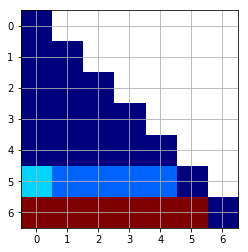

In [80]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 10) # jet doesn't have white color
cmap.set_bad('w') # default value is 'k'
ax1.imshow(p_matrix_values, interpolation="nearest", cmap=cmap)
ax1.grid(True)
plt.show()

#### Heatmap with values and label names

In [108]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(participants)))
    ax.set_yticks(np.arange(len(participants)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(participants)
    ax.set_yticklabels(participants)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(p_matrix_values)):
        for j in range(len(p_matrix_values)):
            text = ax.text(j, i, p_matrix_values[i, j],
                           ha="center", va="center", color="black")

    ax.set_title("Heat map for participants)")
    return im, cbar

##### Heatmap with color legend

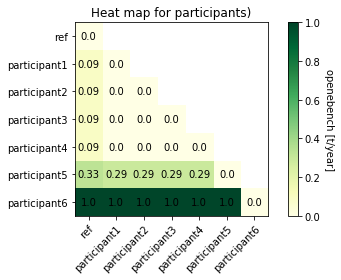

In [109]:
fig, ax = plt.subplots()

im, cbar = heatmap(p_matrix_values, participants, participants, ax=ax,
                   cmap="YlGn", cbarlabel="openebench [t/year]")

fig.tight_layout()
plt.show()